In [244]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 7, Lista1

Frakcja punktów czerwonych jest tym mniejsza im większe jest d, przy czym w okolicach d=5 wynosi około 1%. Aby punktów czerwonych było ok. 10% d powinno być równe ok. 3.3

In [245]:
N=1000

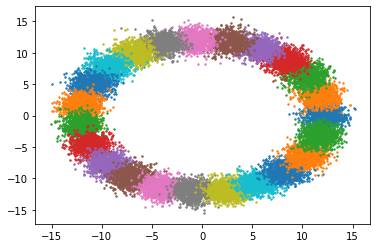

In [246]:
d=3.3
K=23

R=d/(2*np.sin(np.pi/K))
centra=[]
for i in range(0,K):
    centra.append([R*np.cos(2*np.pi*i/K), R*np.sin(2*np.pi*i/K)])

centra=np.array(centra).reshape((K,2,1))

punkty=np.random.randn(K,2,N)
punkty=punkty+np.repeat(centra, N, axis=2)

for i in range(K):
    plt.scatter(punkty[i,0,:], punkty[i,1,:],s=2)



In [247]:
punktyDuplik=punkty.reshape((K,2,N,1)).repeat(K,axis=3)

In [248]:
#Stwórz macierz centraDuplik z odpowiednio zduplikowanymi współrzędnymi centr
centraDuplikP=np.vstack((centra[:,0,:].reshape(K),centra[:,1,:].reshape(K)))

In [249]:
# Zduplikuj centra
# Centra są pogrupowane w K grup, w jednej grupie są współrzędne X i współrzędne Y
# Jeden element listy ze współrzędnymi X to lista zawierająca K liczb odpowiadających 
# współrzędnym X, kolejnych centr

centraDuplik=centraDuplikP.reshape((1,2,1,K)).repeat(N, axis=2).repeat(K,axis=0)

In [250]:
roznicaWspolrzednych=punktyDuplik-centraDuplik

In [251]:
# w k-tej grupie znajduje się N list, w i-tej liście jest odległość
# i-tego punktu z k-tej grupy względem kolejnych centr
# to powoduje że i-ty element, i-tej listy jest odległością od
# centrum grupy do której należy i-ty punkt
odleglosci=np.sqrt(np.sum(roznicaWspolrzednych**2,axis=1))

In [252]:
# w k-tej liście na i-tej pozycji jest odległość
# i-tego punktu z k-tej grupy od najbliższego centrum 
odlegloscOdNajblizszegoCentrum=odleglosci.min(axis=2)

In [253]:
# w k-tej liście, na i-tej pozycji jest odległość
# i-tego punktu, z k-tej grupy od centrum swojej grupy
odlegloscPunktuOdWlasnegoCentrum=np.sqrt(((punkty-centra)**2).sum(axis=1))

In [254]:
# w k-tej liście, na i-tej pozycji jest jedynka jeśli
# i-ty punkt z k-tej grupy ma bliżej do innego centrum, niż do swojego
czyBlizejInnego=np.clip(np.ceil(odlegloscPunktuOdWlasnegoCentrum-odlegloscOdNajblizszegoCentrum),0,1)

In [255]:
#print(czyBlizejInnego.shape)
#print(N*K)
#print(np.sum(czyBlizejInnego))
print(np.sum(czyBlizejInnego)*100/(N*K),"%")

10.321739130434782 %


In [256]:
kolory=np.where(czyBlizejInnego==1, 'r','g')

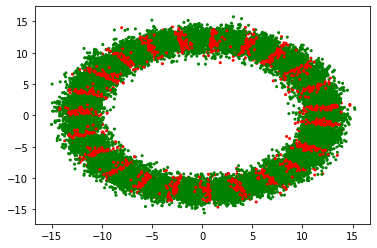

In [257]:
for i in range(K):
    plt.scatter(punkty[i,0,:], punkty[i,1,:],c=kolory[i,:],s=4)
